##  아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.


In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
import time

In [ ]:
# 고객 속성 데이터프레임 만들기

random.seed(1)

#고객별 속성 데이터프레임 만들기

cusno=np.arange(1001,2001)
#cusno=random.sample(list(range(1000,9000)),1000)
gender=np.random.choice([0,1],size=1000)
age=np.random.randint(10,81,size=1000)
region=np.random.randint(1,11,size=1000)

In [ ]:
cusno=pd.Series(cusno)
gender=pd.Series(gender)
age=pd.Series(age)
region=pd.Series(region)

#시리즈 합쳐서 데이터프레임 만들기
customer=pd.concat([cusno,gender,age,region],axis=1)

#컬럼명 지정
customer.columns=['cusno','gender','age','region']

customer.head()

,cusno,gender,age,region
0,1001,1,74,9
1,1002,1,45,1
2,1003,0,64,2
3,1004,1,61,5
4,1005,0,56,4


In [ ]:
# 거래 데이터프레임 만들기
tdf = pd.DataFrame(columns=['pur_id','cusno','product','price','quantity','amount'])
#기본거래 데이터 만들기

#1. 거래 id 만들기
pur_id=random.sample(list(range(10000,50000)),10000)

#2. 중복 cusno 만들기
cusno=np.random.randint(1001,2001,size=10000)   #기존 cusno가 중복될 수 있도록 만들기

#3. 기본거래 데이터 만들기
product=np.random.choice([10,20,30],size=10000)
# product=[random.randrange(10,40,10) for i in range(10000)]
price=np.random.uniform(1000,50000,size=10000).round(2)
quantity=np.random.randint(1,100,size=10000)
amount=price*quantity

tdf['pur_id'] = pur_id
tdf['cusno'] = cusno
tdf['product']=product
tdf['price']=price
tdf['quantity']=quantity
tdf['amount']=amount

date_list = list(pd.date_range('2020-01-01','2021-12-31',freq='D'))
tdf['date'] = np.random.choice(date_list, size=10000)

# day(요일)
tdf['day']=tdf['date'].apply(lambda x: x.weekday())  #date별 요일을 숫자로 나타냄
tdf['day']=tdf['day'].replace(list(range(7)),['월','화','수','목','금','토','일'])

# 시간
tdf['time']=np.random.randint(1,25,size=10000)

tdf.head()

,pur_id,cusno,product,price,quantity,amount,date,day,time
0,18805,1573,10,28479.17,48,1367000.16,2021-01-20,수,17
1,47303,1174,10,28696.81,21,602633.01,2021-01-23,토,15
2,14135,1457,20,7955.59,61,485290.99,2021-01-01,금,13
3,26716,1279,10,10558.40,4,42233.60,2020-03-02,월,5
4,17727,1418,20,19610.25,51,1000122.75,2020-06-03,수,7


In [ ]:
tdf['pur_id']=tdf.apply(lambda x: str(x.date.year-2000)+str(x.pur_id), axis=1)
tdf.head()

,pur_id,cusno,product,price,quantity,amount,date,day,time
0,2118805,1573,10,28479.17,48,1367000.16,2021-01-20,수,17
1,2147303,1174,10,28696.81,21,602633.01,2021-01-23,토,15
2,2114135,1457,20,7955.59,61,485290.99,2021-01-01,금,13
3,2026716,1279,10,10558.40,4,42233.60,2020-03-02,월,5
4,2017727,1418,20,19610.25,51,1000122.75,2020-06-03,수,7


In [ ]:
#데이터프레임 통합: 공통 변수 cusno를 활용해 데이터 결합
dfm=customer.merge(tdf,on='cusno',how='outer')
dfm.head(10)

,cusno,gender,age,region,pur_id,product,price,quantity,amount,date,day,time
0,1001,1,74,9,2110953,30,15999.49,67,1071965.83,2021-07-24,토,23
1,1001,1,74,9,2130390,20,47426.64,36,1707359.04,2021-06-01,화,24
2,1001,1,74,9,2120651,30,2214.68,74,163886.32,2021-10-27,수,20
3,1001,1,74,9,2024050,20,8178.17,66,539759.22,2020-04-02,목,6
4,1001,1,74,9,2136210,20,13015.34,92,1197411.28,2021-07-16,금,7
5,1001,1,74,9,2137553,30,34339.44,88,3021870.72,2021-07-02,금,19
6,1001,1,74,9,2137297,10,2705.13,22,59512.86,2021-11-18,목,18
7,1001,1,74,9,2144343,30,8980.39,53,475960.67,2021-11-08,월,8
8,1001,1,74,9,2042111,30,37516.24,73,2738685.52,2020-04-08,수,12
9,1001,1,74,9,2039584,30,17856.79,72,1285688.88,2020-11-08,일,18


In [ ]:
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = [1, 2, 3, 4, 5, 6]

# 연령을 범주화하여 새로운 열 'age_cat' 생성
dfm['age_cat'] = pd.cut(dfm['age'], bins=bins, labels=labels, right=False)
dfm.drop('age', axis=1, inplace=True)
dfm.head()

,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat
0,1001,1,9,2110953,30,15999.49,67,1071965.83,2021-07-24,토,23,6
1,1001,1,9,2130390,20,47426.64,36,1707359.04,2021-06-01,화,24,6
2,1001,1,9,2120651,30,2214.68,74,163886.32,2021-10-27,수,20,6
3,1001,1,9,2024050,20,8178.17,66,539759.22,2020-04-02,목,6,6
4,1001,1,9,2136210,20,13015.34,92,1197411.28,2021-07-16,금,7,6


In [ ]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   cusno     10000 non-null  int64         
 1   gender    10000 non-null  int64         
 2   region    10000 non-null  int64         
 3   pur_id    10000 non-null  object        
 4   product   10000 non-null  int64         
 5   price     10000 non-null  float64       
 6   quantity  10000 non-null  int64         
 7   amount    10000 non-null  float64       
 8   date      10000 non-null  datetime64[ns]
 9   day       10000 non-null  object        
 10  time      10000 non-null  int64         
 11  age_cat   10000 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 869.5+ KB


인사이트
1. 코로나로 고급품의 매출은 유지된 반면 생활용품 위주로 판매 급감

In [ ]:
df1 = dfm.copy()

In [ ]:
df1['year'] = df1['date'].apply(lambda x : x.year)
df1.head()

,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat,year
0,1001,1,9,2110953,30,15999.49,67,1071965.83,2021-07-24,토,23,6,2021
1,1001,1,9,2130390,20,47426.64,36,1707359.04,2021-06-01,화,24,6,2021
2,1001,1,9,2120651,30,2214.68,74,163886.32,2021-10-27,수,20,6,2021
3,1001,1,9,2024050,20,8178.17,66,539759.22,2020-04-02,목,6,6,2020
4,1001,1,9,2136210,20,13015.34,92,1197411.28,2021-07-16,금,7,6,2021


In [ ]:
grouped_product = df1.groupby(['product','year'])['amount'].sum()/1000000
grouped_product = grouped_product.round(2)
grouped_product

product  year
10       2020    2149.44
         2021    1988.74
20       2020    2092.39
         2021    2230.18
30       2020    2175.34
         2021    2025.89
Name: amount, dtype: float64

In [ ]:
pivot = grouped_product.unstack()
pivot
growth_rate = ((pivot[2021] - pivot[2020]) / pivot[2020]) * 100
print('제품별 성장율:','\n')
growth_rate

제품별 성장율: 



product
10   -7.476366
20    6.585292
30   -6.870190
dtype: float64

In [ ]:
df2=dfm.copy()

In [ ]:
df2['year'] = df2['date'].apply(lambda x : x.year)
df2.head()

,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat,year
0,1001,1,9,2110953,30,15999.49,67,1071965.83,2021-07-24,토,23,6,2021
1,1001,1,9,2130390,20,47426.64,36,1707359.04,2021-06-01,화,24,6,2021
2,1001,1,9,2120651,30,2214.68,74,163886.32,2021-10-27,수,20,6,2021
3,1001,1,9,2024050,20,8178.17,66,539759.22,2020-04-02,목,6,6,2020
4,1001,1,9,2136210,20,13015.34,92,1197411.28,2021-07-16,금,7,6,2021


In [ ]:
# product
def pddiff(product, price):
    if product == 10:
        return price * 0.5
    elif product == 20:
        return price
    else:
        return price * 1.5

df2['price'] = df2.apply(lambda x: pddiff(x['product'], x['price']) if x['year'] == 2021 else x['price'], axis=1)
df2.head()

,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat,year
0,1001,1,9,2110953,30,23999.235,67,1071965.83,2021-07-24,토,23,6,2021
1,1001,1,9,2130390,20,47426.640,36,1707359.04,2021-06-01,화,24,6,2021
2,1001,1,9,2120651,30,3322.020,74,163886.32,2021-10-27,수,20,6,2021
3,1001,1,9,2024050,20,8178.170,66,539759.22,2020-04-02,목,6,6,2020
4,1001,1,9,2136210,20,13015.340,92,1197411.28,2021-07-16,금,7,6,2021


In [ ]:
# quantiry
def qtydiff(product,quantity):
    if product == 30:
        return quantity
    elif product == 20:
        return quantity * 0.9
    else:
        return quantity * 0.7
df2['quantity'] = df2.apply(lambda x : qtydiff(x['product'],x['quantity']) if x['year'] == 2021 else x['quantity'],axis=1)
df2.head()

,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat,year
0,1001,1,9,2110953,30,23999.235,67.0,1071965.83,2021-07-24,토,23,6,2021
1,1001,1,9,2130390,20,47426.640,32.4,1707359.04,2021-06-01,화,24,6,2021
2,1001,1,9,2120651,30,3322.020,74.0,163886.32,2021-10-27,수,20,6,2021
3,1001,1,9,2024050,20,8178.170,66.0,539759.22,2020-04-02,목,6,6,2020
4,1001,1,9,2136210,20,13015.340,82.8,1197411.28,2021-07-16,금,7,6,2021


In [ ]:
df2['amount'] = df2['price'] * df2['quantity']
grouped_product = df2.groupby(['product','year'])['amount'].sum()/1000000
grouped_product = grouped_product.round(2)
grouped_product

product  year
10       2020    2149.44
         2021     696.06
20       2020    2092.39
         2021    2007.16
30       2020    2175.34
         2021    3038.84
Name: amount, dtype: float64

In [ ]:
pivot = grouped_product.unstack()
pivot
growth_rate = ((pivot[2021] - pivot[2020]) / pivot[2020]) * 100
print('제품별 성장율:','\n')
growth_rate

제품별 성장율: 



product
10   -67.616682
20    -4.073332
30    39.694944
dtype: float64

예시------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pur_10000.csv to pur_10000.csv


In [ ]:
import pandas as pd
df = pd.read_csv('pur_10000.csv')
df.head()

,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat,year
0,1001,0,4,2116615,10,12249.265,59.5,7.288313e+05,2021-02-19,금,4,3,2021
1,1001,0,4,2025304,20,29595.470,5.0,1.479774e+05,2020-05-24,일,4,3,2020
2,1001,0,4,2021552,20,18873.070,67.0,1.264496e+06,2020-06-02,화,22,3,2020
3,1001,0,4,2113811,10,16419.905,54.6,8.965268e+05,2021-01-29,금,18,3,2021
4,1001,0,4,2146825,10,21871.485,68.6,1.500384e+06,2021-09-02,목,18,3,2021


In [ ]:
data = df.copy()

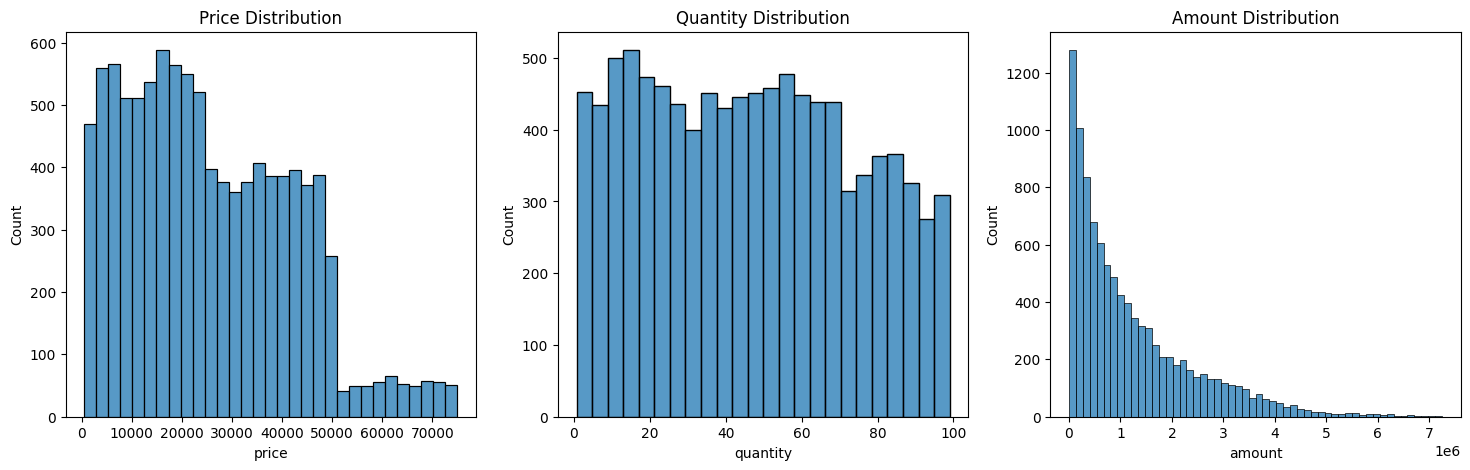

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(data['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(data['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

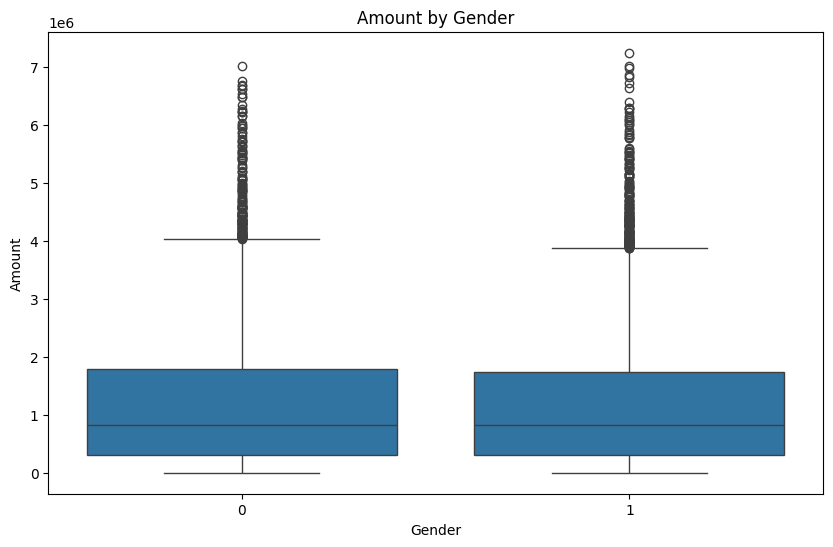

In [ ]:
# 성별에 따른 총 구매 금액의 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='amount', data=data)
plt.title('Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()